# Shannon Entropy

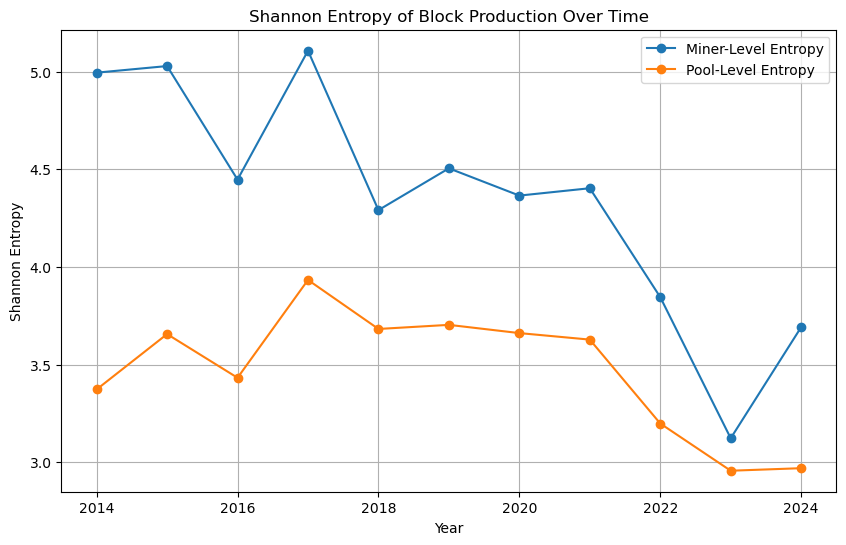

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
# df = pd.read_csv('your_data.csv')  # Replace with your data loading logic

# Function to calculate Shannon Entropy
def calculate_shannon_entropy(data, group_by_column):
    # Group by the specified column and count the number of blocks
    grouped_data = data.groupby(group_by_column).size().reset_index(name='block_count')
    
    # Calculate the proportion of blocks mined by each entity
    total_blocks = grouped_data['block_count'].sum()
    grouped_data['proportion'] = grouped_data['block_count'] / total_blocks
    
    # Calculate Shannon Entropy
    shannon_entropy = -np.sum(grouped_data['proportion'] * np.log2(grouped_data['proportion']))
    return shannon_entropy

# Calculate Shannon Entropy for each year (miner-level and miner-pool-level)
entropy_results = []

for year in df['Year'].unique():
    yearly_data = df[df['Year'] == year]
    
    # Miner-level entropy
    miner_entropy = calculate_shannon_entropy(yearly_data, 'Address')
    
    # Miner-pool-level entropy
    pool_entropy = calculate_shannon_entropy(yearly_data, 'Miner Pool Name')
    
    entropy_results.append({
        'Year': year,
        'Miner Entropy': miner_entropy,
        'Pool Entropy': pool_entropy
    })

# Convert results to a DataFrame
entropy_df = pd.DataFrame(entropy_results)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(entropy_df['Year'], entropy_df['Miner Entropy'], marker='o', label='Miner-Level Entropy')
plt.plot(entropy_df['Year'], entropy_df['Pool Entropy'], marker='o', label='Pool-Level Entropy')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Shannon Entropy')
plt.title('Shannon Entropy of Block Production Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## Nakamoto Coefficient

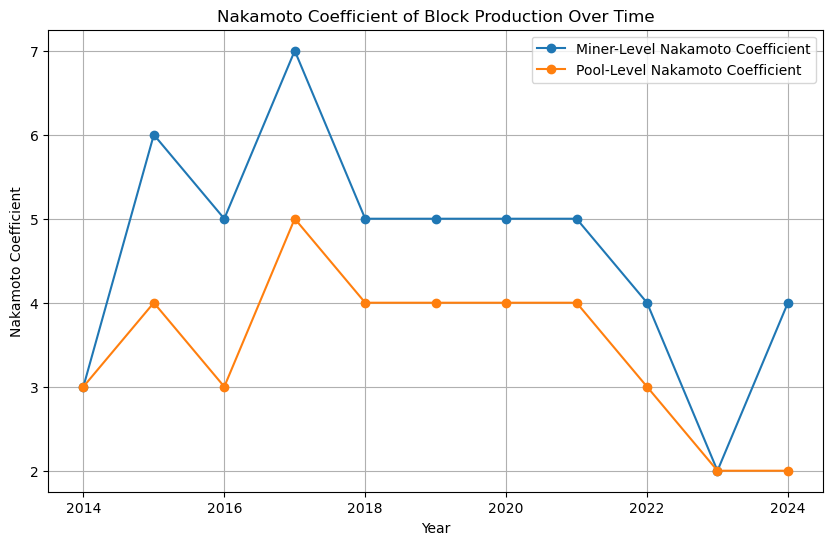

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
# df = pd.read_csv('your_data.csv')  # Replace with your data loading logic

# Function to calculate Nakamoto Coefficient
def calculate_nakamoto_coefficient(data, group_by_column, threshold=0.51):
    # Group by the specified column and count the number of blocks
    grouped_data = data.groupby(group_by_column).size().reset_index(name='block_count')
    
    # Sort by block count in descending order
    grouped_data = grouped_data.sort_values(by='block_count', ascending=False)
    
    # Calculate cumulative proportion of blocks
    total_blocks = grouped_data['block_count'].sum()
    grouped_data['cumulative_proportion'] = grouped_data['block_count'].cumsum() / total_blocks
    
    # Find the Nakamoto Coefficient
    nakamoto_coefficient = grouped_data[grouped_data['cumulative_proportion'] <= threshold].shape[0] + 1
    return nakamoto_coefficient

# Calculate Nakamoto Coefficient for each year (miner-level and pool-level)
nakamoto_results = []

for year in df['Year'].unique():
    yearly_data = df[df['Year'] == year]
    
    # Miner-level Nakamoto Coefficient
    miner_nakamoto = calculate_nakamoto_coefficient(yearly_data, 'Address')
    
    # Pool-level Nakamoto Coefficient
    pool_nakamoto = calculate_nakamoto_coefficient(yearly_data, 'Miner Pool Name')
    
    nakamoto_results.append({
        'Year': year,
        'Miner Nakamoto': miner_nakamoto,
        'Pool Nakamoto': pool_nakamoto
    })

# Convert results to a DataFrame
nakamoto_df = pd.DataFrame(nakamoto_results)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(nakamoto_df['Year'], nakamoto_df['Miner Nakamoto'], marker='o', label='Miner-Level Nakamoto Coefficient')
plt.plot(nakamoto_df['Year'], nakamoto_df['Pool Nakamoto'], marker='o', label='Pool-Level Nakamoto Coefficient')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Nakamoto Coefficient')
plt.title('Nakamoto Coefficient of Block Production Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## Gini Coefficient

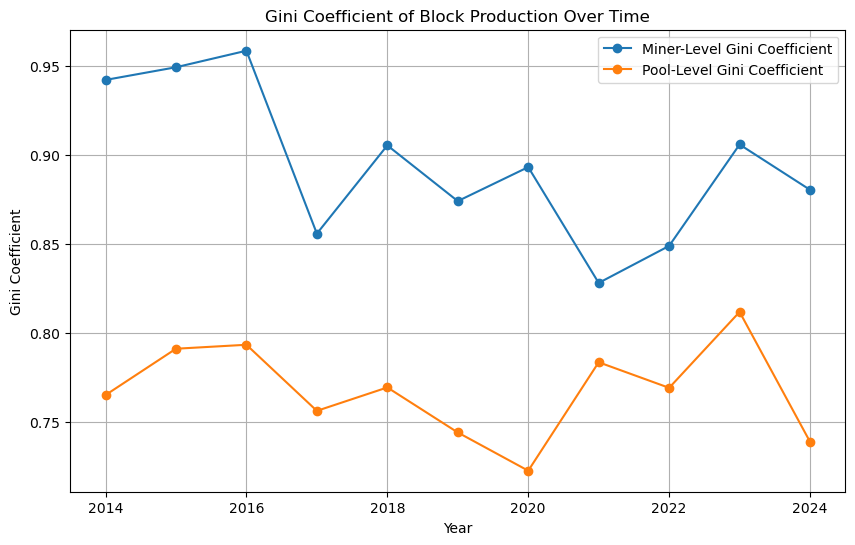

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
# df = pd.read_csv('your_data.csv')  # Replace with your data loading logic

# Function to calculate Gini Coefficient
def calculate_gini_coefficient(blocks):
    blocks = np.sort(blocks)
    n = len(blocks)
    index = np.arange(1, n + 1)
    return (np.sum((2 * index - n - 1) * blocks)) / (n * np.sum(blocks))

# Calculate Gini Coefficient for each year (miner-level and pool-level)
gini_results = []

for year in df['Year'].unique():
    yearly_data = df[df['Year'] == year]
    
    # Miner-level Gini Coefficient
    miner_blocks = yearly_data.groupby('Address').size().reset_index(name='block_count')
    miner_gini = calculate_gini_coefficient(miner_blocks['block_count'])
    
    # Pool-level Gini Coefficient
    pool_blocks = yearly_data.groupby('Miner Pool Name').size().reset_index(name='block_count')
    pool_gini = calculate_gini_coefficient(pool_blocks['block_count'])
    
    gini_results.append({
        'Year': year,
        'Miner Gini': miner_gini,
        'Pool Gini': pool_gini
    })

# Convert results to a DataFrame
gini_df = pd.DataFrame(gini_results)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(gini_df['Year'], gini_df['Miner Gini'], marker='o', label='Miner-Level Gini Coefficient')
plt.plot(gini_df['Year'], gini_df['Pool Gini'], marker='o', label='Pool-Level Gini Coefficient')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Gini Coefficient')
plt.title('Gini Coefficient of Block Production Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## Herfindahl-Hirschman Index (HHI)

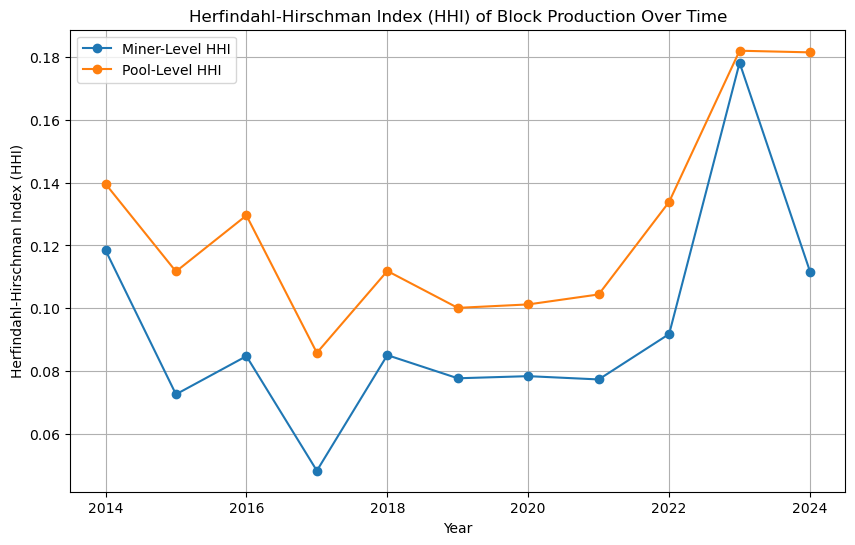

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
# df = pd.read_csv('your_data.csv')  # Replace with your data loading logic

# Function to calculate Herfindahl-Hirschman Index (HHI)
def calculate_hhi(data, group_by_column):
    # Group by the specified column and count the number of blocks
    grouped_data = data.groupby(group_by_column).size().reset_index(name='block_count')
    
    # Calculate the proportion of blocks mined by each entity
    total_blocks = grouped_data['block_count'].sum()
    grouped_data['proportion'] = grouped_data['block_count'] / total_blocks
    
    # Calculate HHI
    hhi = np.sum(grouped_data['proportion'] ** 2)
    return hhi

# Calculate HHI for each year (miner-level and pool-level)
hhi_results = []

for year in df['Year'].unique():
    yearly_data = df[df['Year'] == year]
    
    # Miner-level HHI
    miner_hhi = calculate_hhi(yearly_data, 'Address')
    
    # Pool-level HHI
    pool_hhi = calculate_hhi(yearly_data, 'Miner Pool Name')
    
    hhi_results.append({
        'Year': year,
        'Miner HHI': miner_hhi,
        'Pool HHI': pool_hhi
    })

# Convert results to a DataFrame
hhi_df = pd.DataFrame(hhi_results)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(hhi_df['Year'], hhi_df['Miner HHI'], marker='o', label='Miner-Level HHI')
plt.plot(hhi_df['Year'], hhi_df['Pool HHI'], marker='o', label='Pool-Level HHI')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Herfindahl-Hirschman Index (HHI)')
plt.title('Herfindahl-Hirschman Index (HHI) of Block Production Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()